In [564]:
#Import the nessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

Data:The dataset is .csv files contains the metabolomics data. "Metabolomics" refers the technique can measure a whole set of metabolites (such as amino acids, lipids, etc..)in biological samples.
Each column represent a metabolite, each row represents a sample. The data are labeled by three groups: benign(BN), control(Control), and Oral Squamous Cell Carcinoma(OSCC, a type of cancer).
Data source: The data is a part of my research generated in my lab.
Project Background: OSCC is a type of very aggressive oral cancer, but it is difficult to use current technique to predict this type of cancer. In this project, I collected the metabolomics data of saliva samples. I expect to establish the model which can use to classify the saliva samples to "OSCC","benign tumor" and "normal" with high accuracy. 
Project workflow: Load and clean the data. Use different visualization techniques to check the data quality. After that, different models are fitted and builded. The model are then applied for prediction of training dataset. The performance of each model are also evaluated.

In [627]:
#Load the data
df=pd.read_csv(r"D:\ML\Final_Work\Oral_Cancer_Data.csv")

#Display the first several rows of the column
df.head()
#rt,rt_corrected... are unnecessary data, thus will be dropped later.

,No,Group,1,2,3,4,5,6,7,8,...,5565,5566,5567,5568,5569,5570,5571,5572,5573,5574
0,rt,NaN,53.631038,53.766960,53.631038,53.787167,53.639549,54.589487,55.294938,55.235643,...,699.178440,699.418620,698.346840,708.771000,713.471940,734.055600,751.732920,756.554220,769.092000,768.823500
1,rt_corrected,NaN,120.406546,120.406570,120.864469,120.896613,120.994330,121.326153,122.053864,122.442440,...,1778.922718,1779.740295,1779.746914,1788.608324,1794.861187,1813.373145,1832.070433,1836.282537,1848.879140,1849.048792
2,mz_light,NaN,403.063893,488.117029,495.203438,512.094762,501.116084,375.078311,760.210702,407.139470,...,454.241775,533.279392,489.315280,515.332075,604.355055,312.326072,602.435852,517.345344,673.423537,629.396420
3,mz_heavy,NaN,405.070832,490.123696,497.210275,516.108300,505.128869,377.084791,762.217574,409.146127,...,456.248579,535.286235,491.321972,517.336926,606.362066,314.332610,604.442332,519.352219,675.429911,631.402960
4,mono_mass,NaN,169.005563,254.058699,261.145108,44.985382,34.006704,141.019982,526.152372,173.081140,...,220.183445,299.221062,255.256950,281.273745,370.296725,78.267742,368.377522,283.287014,439.365207,395.338090


In [629]:
#Check the dataset if any NA show up
print(df.isna().sum())

No        0
Group     9
1         0
2         0
3         0
         ..
5570      0
5571      1
5572      0
5573     13
5574     14
Length: 5576, dtype: int64


In [566]:
#Drop off the unnecessary information and reset the index
df2=df.drop(df.index[0:9],axis=0)
df2=df2.reset_index(drop=True)

# Display the first several rows of dataset
print(df2.shape)
df2.head()



(41, 5576)


,No,Group,1,2,3,4,5,6,7,8,...,5565,5566,5567,5568,5569,5570,5571,5572,5573,5574
0,IsoMS_results_BN_1_converted.csv,BN,1.998,0.669,1.271,1.447,0.633,0.027,0.739,4.299,...,1.031,0.277,0.284,0.294,2.411,9.999,0.245,0.307,1.484,1.752
1,IsoMS_results_BN_2_converted.csv,BN,3.361,0.413,0.484,1.474,1.218,0.051,0.847,4.343,...,1.543,0.452,0.377,0.391,2.003,4.186,0.172,0.252,NaN,NaN
2,IsoMS_results_BN_3_converted.csv,BN,1.043,0.722,0.755,0.780,0.175,0.079,4.528,0.460,...,1.285,0.156,0.119,0.178,0.104,3.280,0.287,0.127,0.073,0.093
3,IsoMS_results_BN_4_converted.csv,BN,1.272,0.085,0.566,1.260,0.967,0.050,0.329,3.780,...,1.133,0.412,0.489,0.135,0.487,4.347,0.234,0.626,0.528,0.621
4,IsoMS_results_BN_5_converted.csv,BN,0.608,0.558,0.921,NaN,0.352,0.052,6.056,0.462,...,0.376,0.430,0.423,0.629,0.317,3.441,0.863,0.690,NaN,NaN


The data shape of X is (41, 5573)
The data shape of X_train is (32, 5573) The data shape of X_test is (9, 5573)


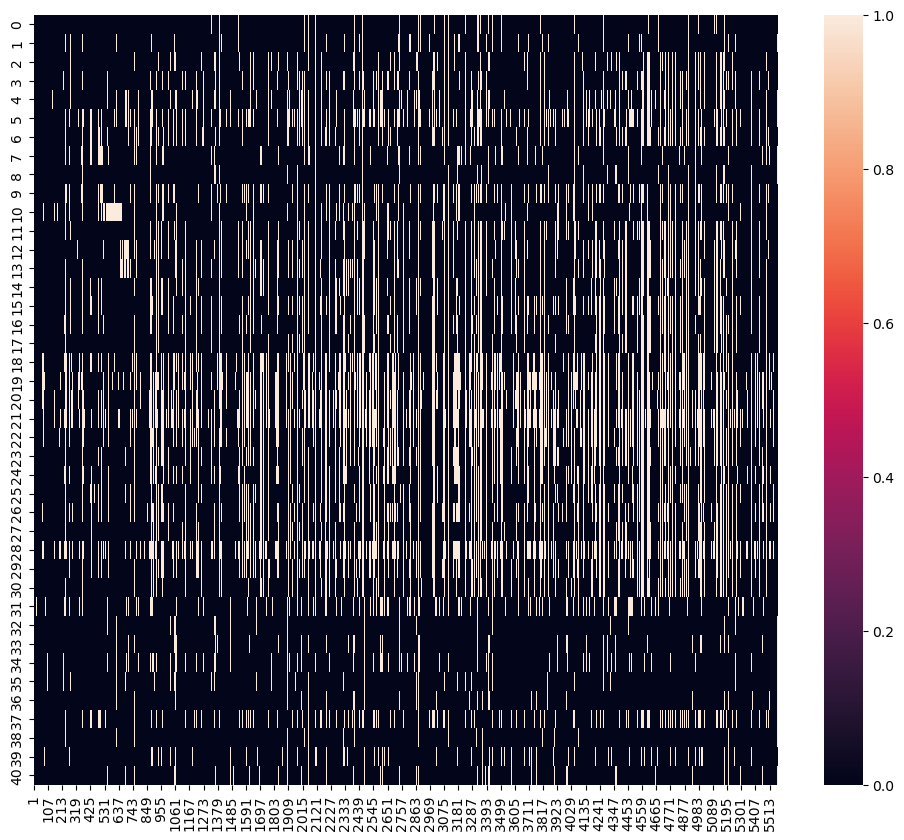

In [631]:
#Split the data set to X and y(label)
X=df2.iloc[:,2:5576]
y=df2["Group"]

#Plot the missing value heatmap, check the data quality
missing_value_plot=X.isna()
plt.figure(figsize=(12, 10))
sns.heatmap(missing_value_plot)


#Fill the missing value by mean in X dataset
X_missing_value_filled=X.fillna(X.mean())
X_missing_value_filled.dropna(inplace=True,axis=1)

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_missing_value_filled)
print("The data shape of X is", X_scaled.shape)

#Split the dataset to train and test set
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=50)
print("The data shape of X_train is", X_train.shape,"The data shape of X_test is", X_test.shape)


<Axes: >

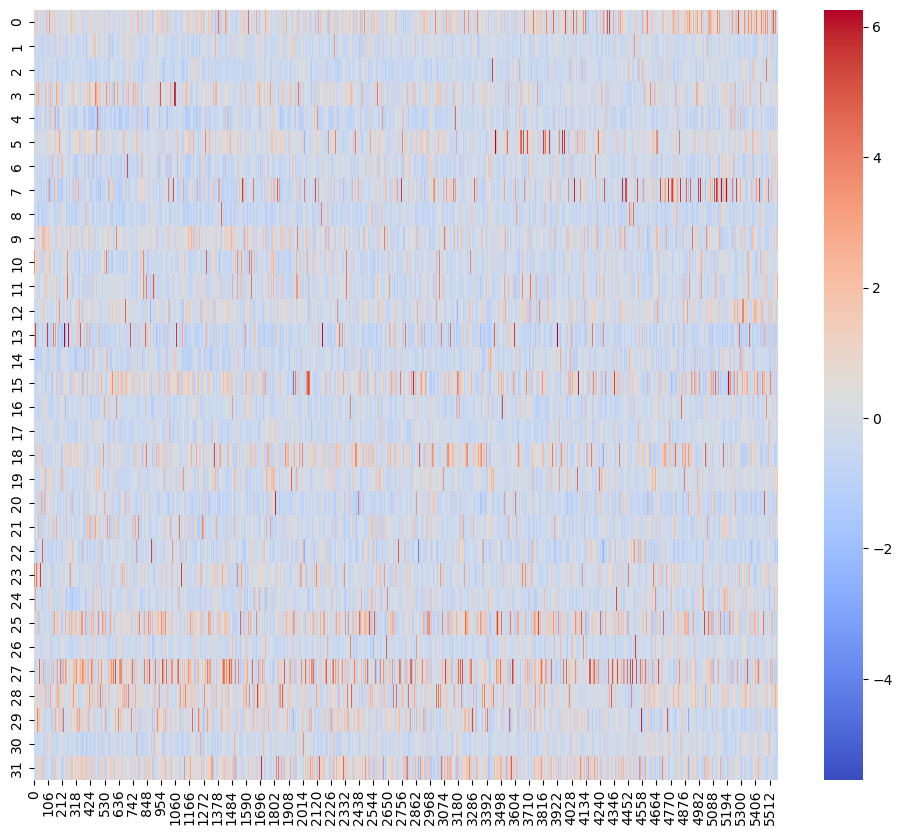

In [633]:
#Display the heatmap of X_train dataset
plt.figure(figsize=(12, 10))
sns.heatmap(X_train,cmap='coolwarm')
sns.volin(X_train[0])


<Axes: >

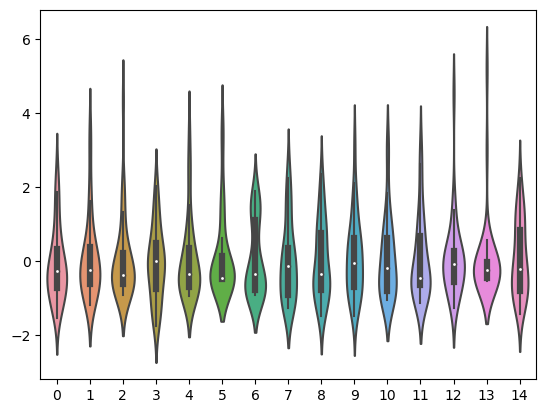

In [653]:
sns.violinplot(pd.DataFrame(X_train).iloc[:,0:15])


<Axes: >

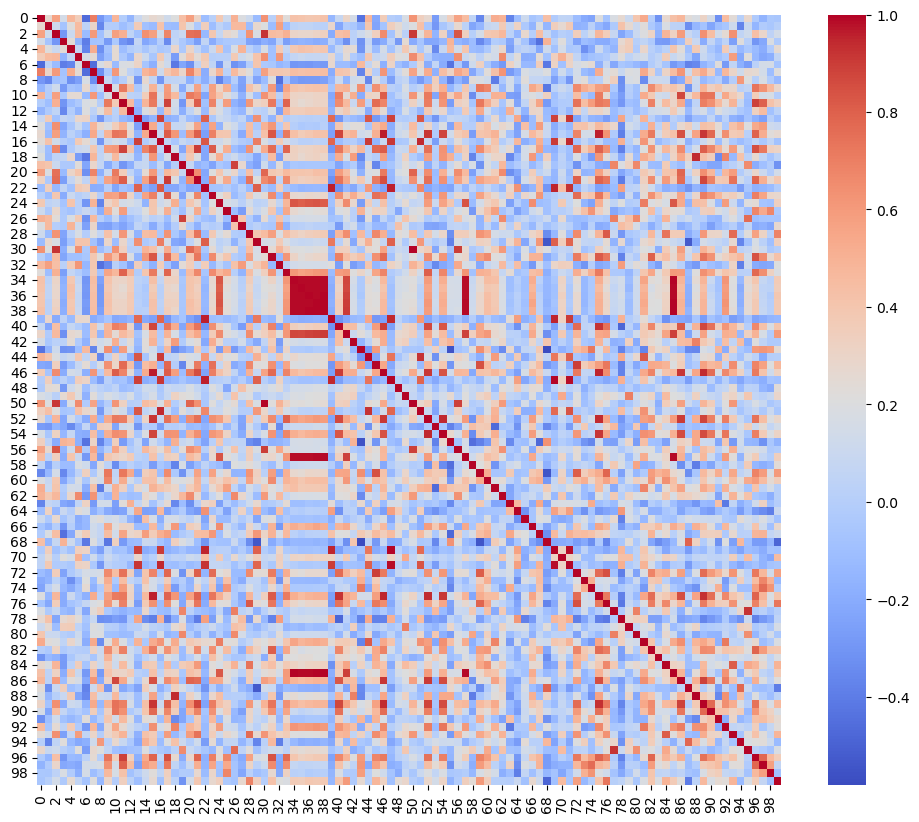

In [635]:
#Display the correlation plot of first 100 features(as there are more than 4000 features).
correlation_matrix=pd.DataFrame(X_train).iloc[:,0:100].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,cmap='coolwarm')

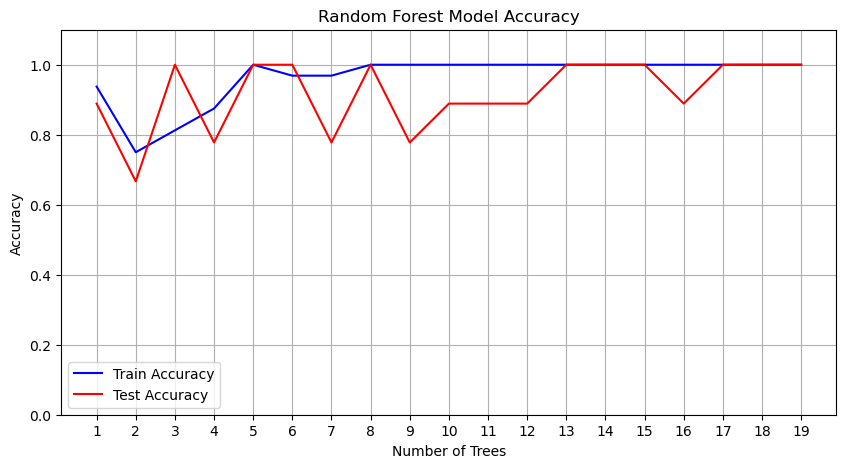

The cross validation score is 0.6952380952380952


In [637]:
#Random Forest Model
scores_train=[]
scores_test=[]
for i in range(1,20):
    RF_Model=RandomForestClassifier(n_estimators=i)
    RF_Model.fit(X_train,y_train)
    y_predict_test=RF_Model.predict(X_test)
    y_predict_train=RF_Model.predict(X_train)
    acc_score_test=accuracy_score(y_test,y_predict_test)
    acc_score_train=accuracy_score(y_train,y_predict_train)
    scores_train.append(acc_score_train)
    scores_test.append(acc_score_test)



#Calculate and plot the number of trees and accuracy score
plt.figure(figsize=(10, 5))
plt.plot(range(1, 20), scores_train, color='b', label='Train Accuracy')
plt.plot(range(1, 20), scores_test, color='r', label='Test Accuracy')
plt.title('Random Forest Model Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(range(1, 20)) 
plt.ylim(0, 1.1) 
plt.grid()
plt.legend()
plt.show()



#Calculate Cross Validation
RF_Model=RandomForestClassifier(n_estimators=15)
RF_Model.fit(X_train,y_train)
Cross_val=cross_val_score(RF_Model,X_train,y_train,cv=5)
print("The cross validation score is",Cross_val.mean())

In [556]:
#Find the important Feature
RF_Model=RandomForestClassifier(n_estimators=8)
RF_Model.fit(X_train,y_train)
importances=RF_Model.feature_importances_
indices = np.argsort(importances)[::-1]  
indices



array([3155, 4321, 5553, ..., 3710, 3711,    0], dtype=int64)

The random forest gives a pretty good prediction of test set, the accuracy score can reach to 1 after more trees are used. The cross validation score is 0.69, which is also a very good score.

In [608]:
#SVM Model

#Use linear kernel first
SVM_model=SVC(C=0.1, kernel="linear")
SVM_model.fit(X_train,y_train)
y_predict=SVM_model.predict(X_test)
confusion=confusion_matrix(y_test,y_predict)
acc_score=accuracy_score(y_test,y_predict)
print("Using linear kernel and C=0.1, the accurate score is ",acc_score)


#Change to rbf kernel
SVM_model=SVC(C=0.1,kernel="rbf")
SVM_model.fit(X_train,y_train)
y_predict=SVM_model.predict(X_test)
acc_score=accuracy_score(y_test,y_predict)
print("Using rbf kernel and C=0.1, the accurate score is ",acc_score)

#Use larger C value with linear model
SVM_model=SVC(C=1, kernel="linear")
SVM_model.fit(X_train,y_train)
y_predict=SVM_model.predict(X_test)
acc_score=accuracy_score(y_test,y_predict)
print("Using linear kernel and C=1, the accurate score is ",acc_score)

#Use larger C value with rbf model
SVM_model=SVC(C=1,kernel="rbf")
SVM_model.fit(X_train,y_train)
y_predict=SVM_model.predict(X_test)
acc_score=accuracy_score(y_test,y_predict)
print("Using rbf kernel and C=1, the accurate score is ",acc_score)

#Calculate cross validation
scores=cross_val_score(SVM_model,X_train,y_train)
print("The cross validation score is",scores.mean())

Using linear kernel and C=0.1, the accurate score is  0.8888888888888888
Using rbf kernel and C=0.1, the accurate score is  0.6666666666666666
Using linear kernel and C=1, the accurate score is  0.8888888888888888
Using rbf kernel and C=1, the accurate score is  1.0
The cross validation score is 0.7523809523809524


Different c values and differrnt kernel are used in SVM model. After we use higher C value and RCF kernel, we get a pretty good accuracy score and cross validation score.

In [598]:
#PLS model
#Convert the label information to number
label_encoder=LabelEncoder()
y_label=label_encoder.fit_transform(y)


#Fit the PLS model
pls=PLSRegression(n_components=2)
pls.fit(X_train,pd.get_dummies(y_train))

#Predict the test dataset
y_predict_test=pls.predict(X_test)
y_pred_classes=np.argmax(y_predict_test,axis=1) 

#Label Convert
y_pred_labels=label_encoder.inverse_transform(y_pred_classes)
acc_score=accuracy_score(y_test,y_pred_labels)

cross_validations=cross_val_score(pls, X_train, pd.get_dummies(y_train), cv=5)
print("The cross validation score is",cross_validations.mean())

The cross validation score is 0.2782694341154418


In PLS model, though high accuracy score is obtained, the cross validation score is very low. It may has a overfitting issue, so it is not a suitable model for this dataset. 

Conclusions: In this project, the oral cancer dataset is loaded by pandas function.The missing value in dataset is visualized by heatmap. All the missing values are filled by mean value, and dataset is normalized. The dataset is visualized by violin plot(first 15 features) and heatmap. Since the dataset have so many features, it is difficult to geneate a corralation map contains all the features. Only 100 features to geneate correlation map. From the properties of the data, we know that it is not suitable to use linear regression or logistic regression to fit the data. Therefore, three other models (Random forest, SVM and PLS) are used to fit the training dataset.  After model is fitted, the accuracy score and cross validation are used to evaluate the model. After tune the parameters in different models, all of them can obtain a pretty high accurate score. However, after cross validation test, the PLS model has relatively low value. The overfitting issue may exist in this model. In the end, I will use random forest model or SVM model for oral cancer prediction. 